In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# Домашнее задание по курсу анализа данных
Версия от 11.12.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 18.12.2021  23:59**

**Жесткий дедлайн: 20.12.2021  8:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


was_married  children        salary  ...     home_cost  drive_info happyness
id                                       ...                                    
0             1       4.0  4.420530e+07  ...  1.003674e+07         NaN  0.727499
1             1       2.0  1.737490e+08  ...  1.014051e+07         0.0  0.383234
2             1       6.0  2.489055e+08  ...  1.043318e+07         NaN  0.432142
3             0       1.0  1.268718e+08  ...  1.004299e+07         NaN  0.377987
4             1       9.0  8.596042e+07  ...  1.021908e+07         NaN  0.657579

[5 rows x 9 columns]

<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? Если есть удалить.
* Найти и удалить выбросы по признаку `home_cost`. (Их не больше 15-х, не меньше 3-х)

In [3]:
#Удаляем повторы
doubles_cnt = data.duplicated().sum()
if doubles_cnt > 0:
  data.drop_duplicates()
else:
  print('No duplicates')

No duplicates


In [4]:
data.reset_index()

id  was_married  children  ...     home_cost  drive_info  happyness
0       0            1       4.0  ...  1.003674e+07         NaN   0.727499
1       1            1       2.0  ...  1.014051e+07         0.0   0.383234
2       2            1       6.0  ...  1.043318e+07         NaN   0.432142
3       3            0       1.0  ...  1.004299e+07         NaN   0.377987
4       4            1       9.0  ...  1.021908e+07         NaN   0.657579
...   ...          ...       ...  ...           ...         ...        ...
5995  495            1       0.0  ...  1.007038e+07         1.0   0.599222
5996  496            1       3.0  ...  1.009348e+07         1.0   0.259710
5997  497            1       0.0  ...  1.016696e+07         0.0   0.258779
5998  498            0       1.0  ...  1.025544e+07         NaN   0.212931
5999  499            1       3.0  ...  1.027476e+07         NaN   0.553919

[6000 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


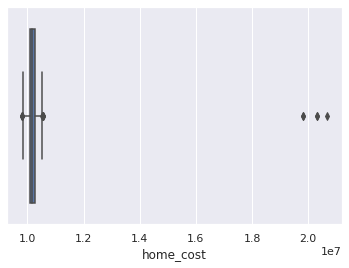

In [5]:
temp_df = data['home_cost']
sns.boxplot(temp_df)

In [6]:
#Найдем выбросы и удалим
left = data['home_cost'] > 1.1e7
right = data['home_cost'] < 0.98e7
data = data.drop(data[left | right].index, axis=0)


In [7]:
data.shape

(5995, 9)

In [8]:
data.reset_index(inplace=True)

# Проверка гипотез (15 баллов)

<div class="alert alert-info">

<b>Описание заданий раздела:</b>    
    
В этом разделе вам предстоит:
* Проверить предложенные утверждения визуально.
* Применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных.

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

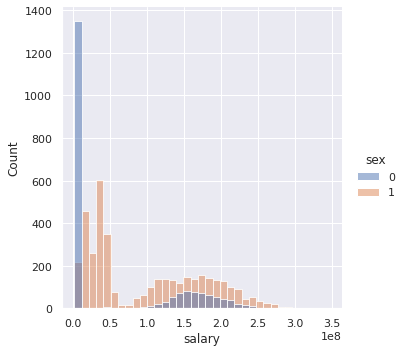

In [ ]:
sns.displot(data, x="salary", hue="sex",bins=35)
plt.show()

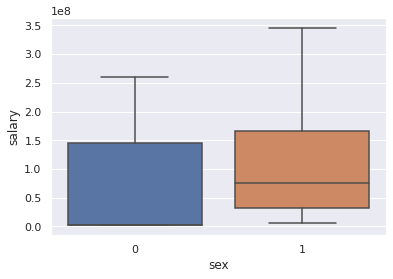

In [ ]:
sns.boxplot(data=data, x="sex", y="salary");

На "ящиках с усами" можно увидеть, что зарплата мужчин в среднем выше, чем женщин, проверим, используя t-test

In [ ]:
male = data[data['sex']==1]['salary']
female = data[data['sex']==0]['salary']

In [ ]:
scipy.stats.ttest_ind(male, female)

Ttest_indResult(statistic=19.089441447734842, pvalue=6.564277825895849e-79)

p-value очень близок к нулю, делаем вывод, что мужчины зарабатывают меньше женщин

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

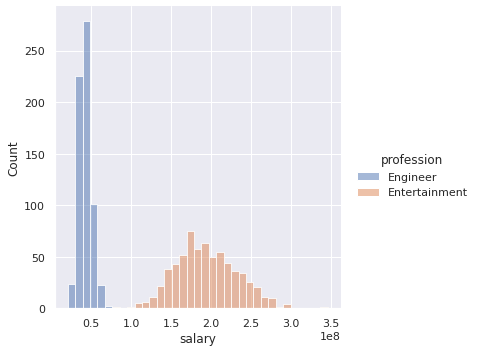

In [15]:
mask = data['profession'].isin(['Engineer','Entertainment'])
sns.displot(data[mask], x="salary", hue="profession",bins=35)
plt.show()

In [16]:
#Визуально видно, что инженеры зарабатывают меньше, воспользуемся t-test
engineer = data[data['sex']==1]['salary']
entertainment = data[data['sex']==0]['salary']
_, p = scipy.stats.ttest_ind(engineer, entertainment)
print(p)

2.3378957904884454e-79


<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

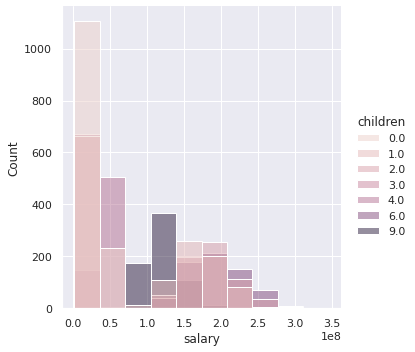

In [17]:
sns.displot(data, x='salary', hue ='children', bins=10)

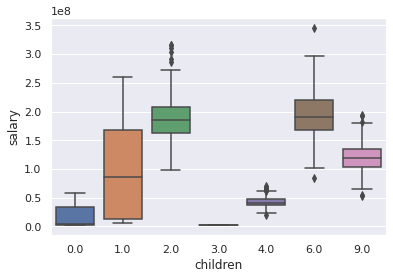

In [18]:
sns.boxplot(data=data, x="children", y="salary");

In [22]:
#Сложно сделать какие-то выводы из графиков
less_than_4 = data[data['children'] <= 3]['salary']
least = data[data['children'] > 3]['salary']
print(scipy.stats.ttest_ind(less_than_4, least))
print(less_than_4.mean())
print(least.mean())

Ttest_indResult(statistic=-24.68575577367092, pvalue=3.2135564930092e-128)
67500796.0390939
119251724.70564434


p-value стремится к нулю, делаем вывод, что гипотеза неверна

<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

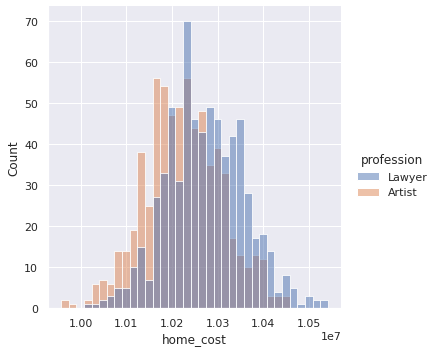

In [23]:
mask = data['profession'].isin(['Artist','Lawyer'])
sns.displot(data[mask], x="home_cost", hue="profession",bins=35)
plt.show()

In [24]:
lawyer_hc = data[data['profession'] == 'Lawyer']['salary']
artist_hc = data[data['profession'] == 'Artist']['salary']
print(scipy.stats.ttest_ind(lawyer_hc, artist_hc))
print(lawyer_hc.mean())
print(artist_hc.mean())

Ttest_indResult(statistic=31.798436996891393, pvalue=1.0259085070558155e-165)
168866583.34838364
119952575.13937283


Тест говорит, что дома юристов дороже, чем дома артистов

<div class="alert alert-warning">
    
* Правда ли, что недвижимость у бывавших в браке в среднем дороже, чем у не бывавших в браке?

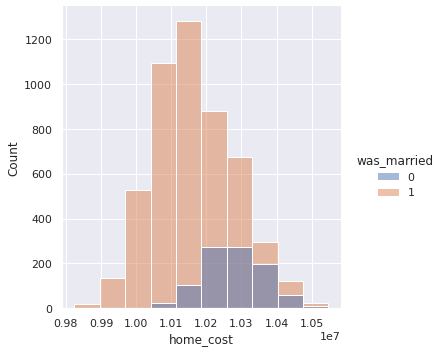

In [25]:
sns.displot(data, x='home_cost', hue ='was_married', bins=10)

In [10]:
#Визуально кажется, что - да, проверим t-testom
married_hc = data[data['was_married'] == 1]['home_cost']
not_married_hc = data[data['was_married'] == 0]['home_cost']
print(scipy.stats.ttest_ind(married_hc, not_married_hc))

Ttest_indResult(statistic=-28.10532125782182, pvalue=2.2517376196467392e-163)


Делаем вывод, что в среднем дома тех, кто был в браке, дороже домов тех людей, которые в браке не были

<div class="alert alert-warning">
    
* Прада ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - воспользуйтесь критерием хи-квадрат из библиотеки scipy

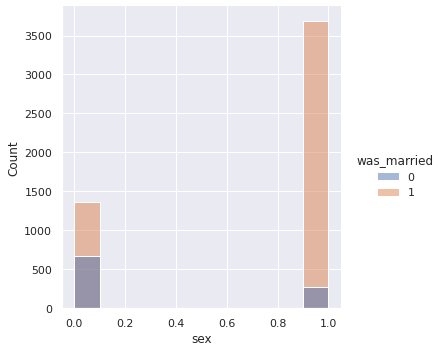

In [11]:
sns.displot(data, x='sex', hue ='was_married', bins=10)

In [ ]:
married_male = data[data['was_married'] == 1]['was_married']
married_female = data[data['was_married'] == 0]['was_married']


# Гипотезы при множественном тестировании (10 баллов)

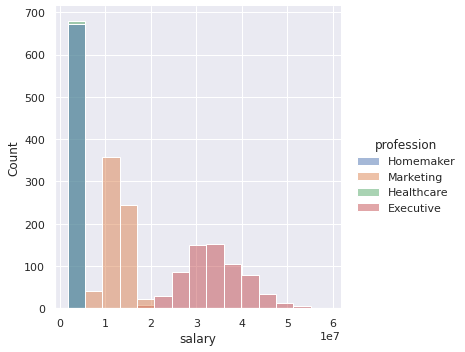

In [12]:
# Подсказка: 
# - дисперсионный анализ  f_oneway()
# - Крускал Уоллиса
mask = data['profession'].isin(['Homemaker', 'Marketing', 'Healthcare','Executive'])
sns.displot(data[mask], x="salary", hue="profession",bins=15)

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

In [14]:
homemaker_salary = data[data['profession'] == 'Homemaker']['salary']
marketing_salary = data[data['profession'] == 'Marketing']['salary']
healthcare_salary = data[data['profession'] == 'Healthcare']['salary']
executive_salary = data[data['profession'] == 'Executive']['salary']
scipy.stats.f_oneway(homemaker_salary, marketing_salary, healthcare_salary, executive_salary)

F_onewayResult(statistic=12655.23046474974, pvalue=0.0)

Зарплаты заметно отличаются, что показывает график и oneway

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

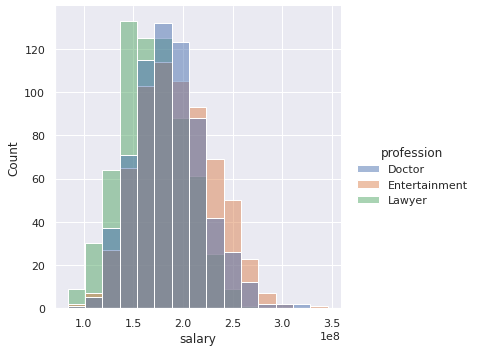

In [15]:
mask = data['profession'].isin(['Doctor', 'Entertainment', 'Lawyer'])
sns.displot(data[mask], x="salary", hue="profession",bins=15)

In [17]:
#Визуально сложно сделать выводы, попробуем попарно
doctor_salary = data[data['profession'] == 'Doctor']['salary']
entertainment_salary = data[data['profession'] == 'Entertainment']['salary']
lawyer_salary = data[data['profession'] == 'Lawyer']['salary']

print(scipy.stats.ttest_ind(doctor_salary, entertainment_salary))
print(scipy.stats.ttest_ind(lawyer_salary, entertainment_salary))
print(scipy.stats.ttest_ind(doctor_salary, lawyer_salary))
print(scipy.stats.f_oneway(doctor_salary, lawyer_salary, entertainment_salary))

Ttest_indResult(statistic=-3.9893981227016204, pvalue=6.986748559903525e-05)
Ttest_indResult(statistic=-13.011181249750216, pvalue=1.5819722886994198e-36)
Ttest_indResult(statistic=9.32053279754486, pvalue=4.6715538747317954e-20)
F_onewayResult(statistic=89.56052385242253, pvalue=5.67666591800931e-38)


Однако, средние зарплаты сильно отличаются

# Регрессионный Анализ (20 баллов)

Взглянем от чего зависит уровень счастья

In [ ]:
import statsmodels.formula.api as smf

# Рекомендации: 
# Используйте библиотку statsmodels для оценки вклада каждого фактора
# Выведения отчета о модели - model.summary()

<div class="alert alert-warning">
    
Выполните следующие задания и на основе результатов ответьте на вопросы:

* Постройте регрессионную модель зависимости уровня счастья от приведенных факторов (was_married, children, salary, sex, age, home_cost)
* Существует ли связь между уровнем счастья и зарплатой?

* Насколько сильны эти отношения?

* Как факт брака способствуют стоимости недвижимости?

* Зная влияние каждого фактора, можем ли мы предсказать уровень счастья?

* Постройте график зависимостей целевой переменной от приведенных числовых факторов. 
    
* Какие признаки не влияют на уровень счастья? (стат. значимость)
    
* Какой признак самый сильный?
    
* Постройте график остатков. Всю ли информацию смогла извлечь ваша модель из данных?

* Наблюдается ли гетероскедастичность в остатках?
    
* Есть ли в данных автокоррелированность?  

In [18]:
import statsmodels.api as sm
cols = ['was_married', 'children', 'salary', 'sex', 'age', 'home_cost']
y_col = data['happyness']
x = data[cols]
model = sm.OLS(y_col, x)
res = model.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:              happyness   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                          1.832e+04
Date:                Mon, 20 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:08:22   Log-Likelihood:                          4710.3
No. Observations:                5995   AIC:                                     -9409.
Df Residuals:                    5989   BIC:                                     -9369.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
 #salary и home_cost почти не вносят вклад в счастье

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


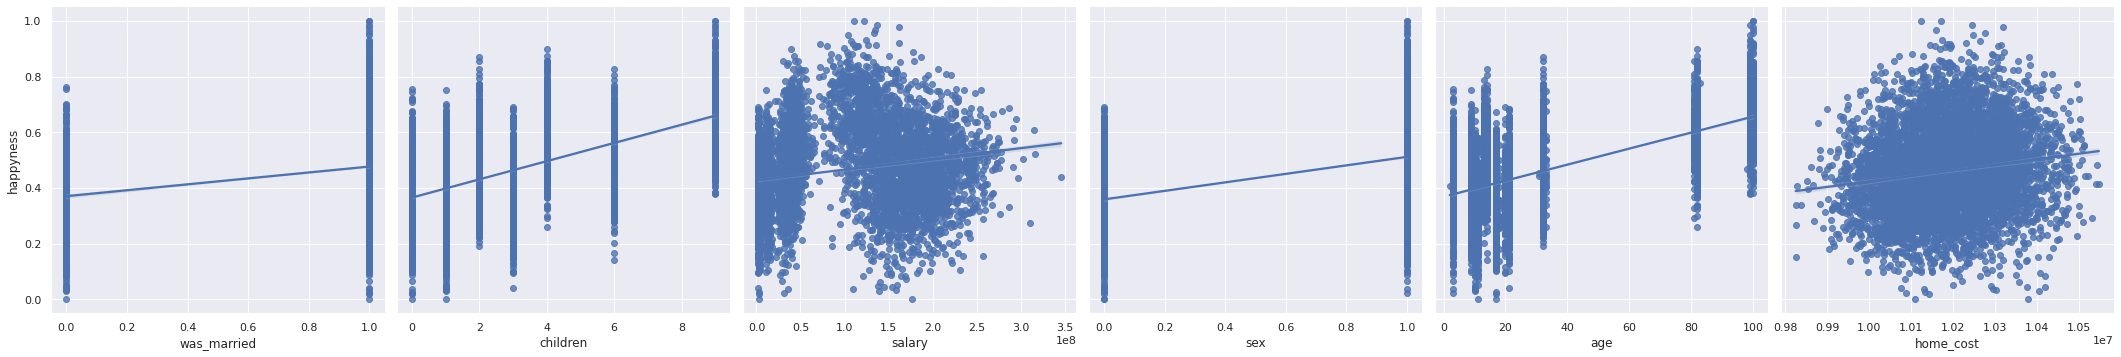

In [20]:
sns.pairplot(data, y_vars='happyness', x_vars=cols, size=5,kind='reg')

In [22]:
from statsmodels.stats.diagnostic import het_breuschpagan
_, _, _, p = het_breuschpagan(res.resid, data[cols].values)

In [23]:
print(p)

0.0


In [ ]:
#Гипотеза о гомоскедастичности неверна

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**